In [5]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

d:\measuring\data


SSRO calibration :  20160822/150028
max. F = (94.74 +/- 0.44)% at t=8 us
	ms_0 = (89.74 +/- 0.43)%
	ms_1 = (99.74 +/- 0.07)%


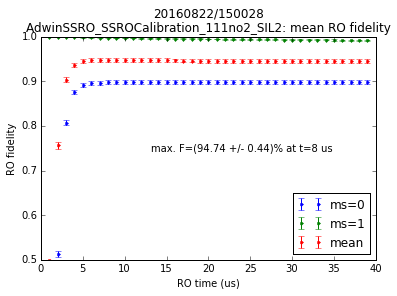

In [22]:
ssro.ssrocalib(plot_photon_ms0=False)#, folder = 'D:\measuring\data\20160310\180505_AdwinSSRO_SSROCalibration_111no2_SIL2')
# print 'Threshold is 96.6'

# DARKESR

d:\measuring\data\20160614\150034_PulsarDarkESR_111no2_SIL2
Converged with chi squared  0.0257036570572
degrees of freedom, dof  146
RMS of residuals (i.e. sqrt(chisq/dof))  0.013268475632
Reduced chisq (i.e. variance of residuals)  0.000176052445597

fitted parameters at minimum, with 68% C.I.:
 0 a              1.003747 +/-   0.001258
 1 A              0.118103 +/-   0.004253
 2 sigma          0.000136 +/-   0.000005
 3 x0             1.716396 +/-   0.000004
 4 s1             0.002182 +/-   0.000005

correlation matrix:
               a         A         sigma     x0        s1        
         a  1.000000
         A  0.250287  1.000000
     sigma  0.280768 -0.463230  1.000000
        x0  0.000000  0.000159 -0.000152  1.000000
        s1 -0.000000  0.000000 -0.000000 -0.000000  1.000000



C:\Canopy\User\lib\site-packages\ipykernel\__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


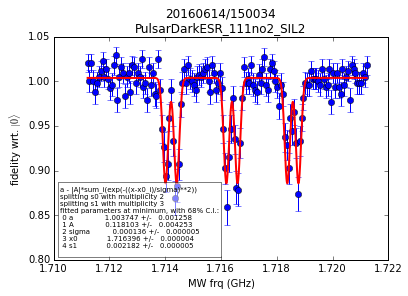

In [6]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis_purification.py')

# Pi pulses

d:\measuring\data\20160818\090925_Pi_Calibration_111no2_SIL2Pi
[ 0.056   0.044   0.0385  0.041   0.0405  0.0255  0.039   0.041   0.0485
  0.0515  0.062   0.0785]
min x =  0.935363636364
min y = 0.0251182698806
[ 0.056   0.044   0.0385  0.041   0.0405  0.0255  0.039   0.041   0.0485
  0.0515  0.062   0.0785]
min x =  0.935363636364
min y = 0.0251182698806
fitted infidelity 0.035
Fitted minimum at  0.932


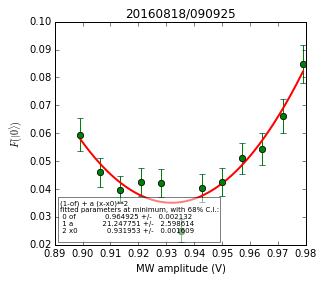

In [26]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Cal')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.94,a_guess=4,of_guess=0.2, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
#ax.set_ylim(0,1.)
print 'fitted infidelity', np.round(1-fit['params'][0],3)
print 'Fitted minimum at ', np.round(fit['params'][2],3)

# Pi/2

[ 0.468  0.492  0.516  0.54   0.564  0.588  0.612  0.636  0.66   0.684
  0.708]
Converged with chi squared  0.00292703274694
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0180340195401
Reduced chisq (i.e. variance of residuals)  0.000325225860771

fitted parameters at minimum, with 68% C.I.:
 0 m             -2.240813 +/-   0.071645
 1 x0             0.580323 +/-   0.002439

correlation matrix:
               m         x0        
         m  1.000000
        x0 -0.100641  1.000000



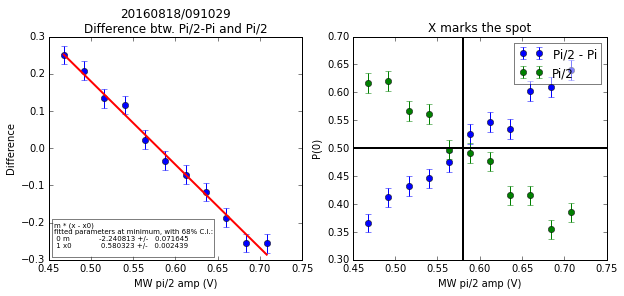

In [27]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

# T1

Converged with chi squared  0.0134102374476
degrees of freedom, dof  12
RMS of residuals (i.e. sqrt(chisq/dof))  0.0334293252594
Reduced chisq (i.e. variance of residuals)  0.0011175197873

fitted parameters at minimum, with 68% C.I.:
 0 A              0.689155 +/-   0.018185
 1 tau        308423.554293 +/- 46922.825445

correlation matrix:
               A         tau       
         A  1.000000
       tau -0.820201  1.000000

minimal point: 100000.0


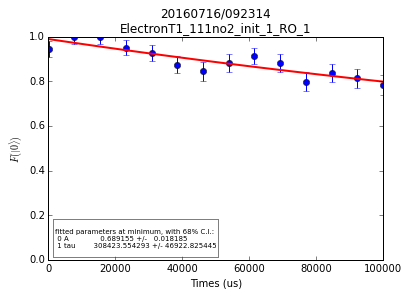

In [12]:
### no RO correction
from analysis.lib.fitting import fit
folder= tb.latest_data('ElectronT1')
a=sequence.SequenceAnalysis(folder)
a.get_sweep_pts()
a.get_readout_results(name='ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(0.0,1.0)
y = a.p0
p0,fitfunc,fitfunc_str = common.fit_exp_decay_with_offset(0.3,0.7,50e3)
fit_result = fit.fit1d(a.sweep_pts,y,None,p0=p0,fitfunc=fitfunc,do_print=True,fixed=[0],ret=True)
plot.plot_fit1d(fit_result,np.linspace(a.sweep_pts[0],a.sweep_pts[-1],100),ax=ax,plot_data=False)
print 'minimal point:',a.sweep_pts[np.argmin(a.normalized_ssro)]

# PM Sweep

[ 0.13   0.079  0.052  0.046  0.034  0.029  0.036  0.03   0.04   0.033
  0.028  0.045  0.026  0.041  0.026  0.044  0.042  0.04   0.022  0.043]
min x =  18.9473684211
min y = 0.0024101665206


(0, 1.0)

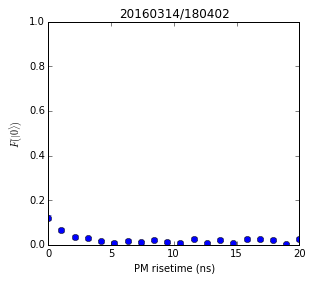

In [115]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('PMrisetime')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
#fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0,1.)

# Theta pulses

d:\measuring\data\20160822\152804_Pi_Calibration_111no2_SIL2theta
[ 0.2646  0.253   0.2534  0.2318  0.2362  0.231   0.2176  0.216   0.2126
  0.2176  0.1982  0.2016]
min x =  0.885909090909
min y = 0.218072019682


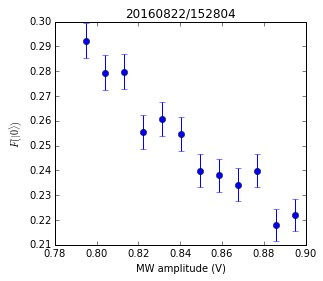

In [23]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('theta')
print folder
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.plot_result(folder, ax=ax)#, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#ax.set_ylim(0.6,0.9)